In [12]:
# ## Data Analytics Final Project
# ## Topic: Superstore Sales Analysis


In [13]:
# 📊 Data Analytics Final Project
# Topic: "Profitability by Product or Region"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [14]:

# Load the CSV file from  folder
import pandas as pd

file_path = r"C:\Users\HP VICTUS\OneDrive\Desktop\python\final project\superstore_final_dataset (1).csv"

df = pd.read_csv(file_path, encoding="latin1")  # or encoding="cp1252" if latin1 fails
df.head()







,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.00,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37


In [15]:
#checkinformation
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row_ID,Postal_Code,Sales
count,9800.00,9789.00,9800.00
mean,4900.50,55273.32,230.77
std,2829.16,32041.22,626.65
min,1.00,1040.00,0.44
25%,2450.75,23223.00,17.25
50%,4900.50,58103.00,54.49
75%,7350.25,90008.00,210.61
max,9800.00,99301.00,22638.48


In [16]:
#check missing values
df.isnull().sum()


Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [17]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip()


In [18]:
#  Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()

Number of duplicate rows: 0


In [19]:
#  Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


In [20]:
#  Dataset statistics
print("\nDataset statistics:")
print(df.describe())


Dataset statistics:
       Row_ID  Postal_Code    Sales
count 9800.00      9789.00  9800.00
mean  4900.50     55273.32   230.77
std   2829.16     32041.22   626.65
min      1.00      1040.00     0.44
25%   2450.75     23223.00    17.25
50%   4900.50     58103.00    54.49
75%   7350.25     90008.00   210.61
max   9800.00     99301.00 22638.48


In [21]:
#  Create a Derived Column
if 'Profit' in df.columns and 'Sales' in df.columns:
    df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100

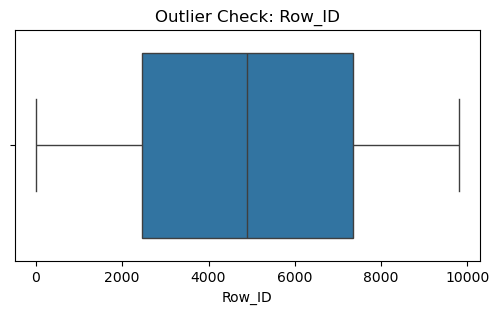

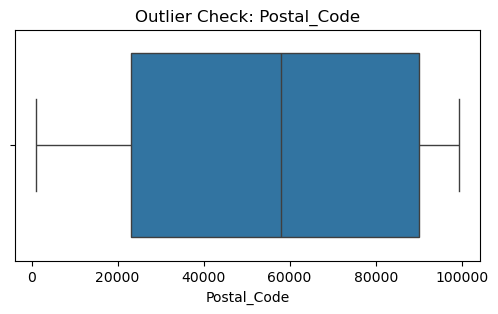

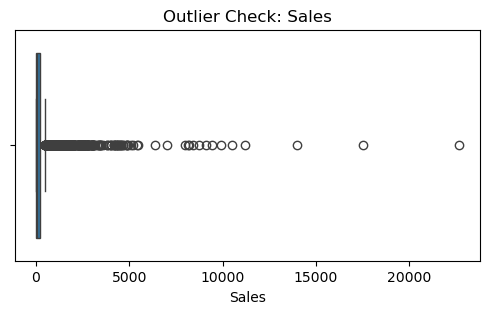

In [22]:
#  Outlier Check 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

In [23]:
#  Final dataset shape
print(f"\nData shape after cleaning: {df.shape}")


Data shape after cleaning: (9800, 18)
